<a href="https://colab.research.google.com/github/demekeendalie/Fine-tuning-bert-model-for-amharic-news-classification/blob/main/Fine_tuning_BERT_for_Amharic_news_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# reading the dataset from my drive using the above drive
dataframe1 =pd.read_excel('/content/drive/My Drive/dataset1.xlsx')
dataframe2 =pd.read_excel('/content/drive/My Drive/dataset2.xlsx')

In [4]:
dataframe1.category.unique()

array(['accident', 'agriculture', 'health', 'education', 'economy',
       'politics', 'sport'], dtype=object)

In [5]:
# merging the two dataframes
frame=[dataframe1,dataframe2]
dataframe=pd.concat(frame)

In [6]:
print(dataframe)

                                              articles   category
0     ግንቦት 13/2011  በተሽከርካሪ አደጋ ድንገተኛ ህክምና የተፈቀደው ሁ...   accident
1    ሚያዝያ  25/ 2011 የሰሜን ተራሮች ብሄራዊ ፓርክን የአደጋ ስጋቶች ለ...   accident
2    በደቡብ ወሎ ዞን ኩታበር ወረዳ ዛሬ በደረሰ የትራፊክ አደጋ በ11 ሰዎች ...   accident
3    የህዝብ ተወካዮች ምክር ቤት አባላት ዛሬ ጠዋት የተፈናቀሉ ወገኖችን ለመጎ...   accident
4    በባህር ዳር ከተማ ቀበሌ 05 በእሳት አደጋ ቤትና ንብረት የወደመባቸው ሰ...   accident
..                                                 ...        ...
695  ጎባ፤ መስከረም 16/2015 (ኢዜአ) መደ ወላቡ ዩኒቨርሲቲ ተጨማሪ 13 ...  education
696  ባህር ዳር ሰኔ 7/2010 በአማራ ክልል ከህብረተሰቡ ከደረሱት ጥቆማዎች ...  education
697  አዲስ አበባ ሰኔ 29/2010 የትምህርት ጥራት ጉድለት በአገሪቱ ላይ ዘር...  education
698  አዲስ አበባ፤ መስከረም 15/ 2016 (ኢዜአ)፦ በተባበሩት አረብ ኤምሬቶ...  education
699  አዲስ አበባ መጋቢት 4/2012(ኢዜአ) ግማሽ ቢሊዮን ብር ወጪ የተደረገበ...  education

[2181 rows x 2 columns]


In [7]:
# changing category to numeric
label=pd.Categorical(dataframe['category']).codes
label=pd.DataFrame(label)
dataframe['labels']=pd.DataFrame(label)
print(dataframe)

                                              articles   category  labels
0     ግንቦት 13/2011  በተሽከርካሪ አደጋ ድንገተኛ ህክምና የተፈቀደው ሁ...   accident       0
1    ሚያዝያ  25/ 2011 የሰሜን ተራሮች ብሄራዊ ፓርክን የአደጋ ስጋቶች ለ...   accident       0
2    በደቡብ ወሎ ዞን ኩታበር ወረዳ ዛሬ በደረሰ የትራፊክ አደጋ በ11 ሰዎች ...   accident       0
3    የህዝብ ተወካዮች ምክር ቤት አባላት ዛሬ ጠዋት የተፈናቀሉ ወገኖችን ለመጎ...   accident       0
4    በባህር ዳር ከተማ ቀበሌ 05 በእሳት አደጋ ቤትና ንብረት የወደመባቸው ሰ...   accident       0
..                                                 ...        ...     ...
695  ጎባ፤ መስከረም 16/2015 (ኢዜአ) መደ ወላቡ ዩኒቨርሲቲ ተጨማሪ 13 ...  education       3
696  ባህር ዳር ሰኔ 7/2010 በአማራ ክልል ከህብረተሰቡ ከደረሱት ጥቆማዎች ...  education       3
697  አዲስ አበባ ሰኔ 29/2010 የትምህርት ጥራት ጉድለት በአገሪቱ ላይ ዘር...  education       3
698  አዲስ አበባ፤ መስከረም 15/ 2016 (ኢዜአ)፦ በተባበሩት አረብ ኤምሬቶ...  education       3
699  አዲስ አበባ መጋቢት 4/2012(ኢዜአ) ግማሽ ቢሊዮን ብር ወጪ የተደረገበ...  education       3

[2181 rows x 3 columns]


In [8]:
# mixing each categories and thier labels
dataframe=dataframe.sample(frac=1)

In [9]:
dataframe['word_len'] = dataframe['articles'].str.split().str.len()
print(dataframe['word_len'].mean())

314.2563044475011


In [10]:
#number of news under each categories
#accident=dataframe[dataframe['category']=='accident']
#agir=dataframe[dataframe['category']=='agriculture']
#health=dataframe[dataframe['category']=='health']
#education=dataframe[dataframe['category']=='education']
#economy=dataframe[dataframe['category']=='economy']
#politics=dataframe[dataframe['category']=='politics']
#sport=dataframe[dataframe['category']=='sport']
#print(accident.shape)
#print(agir.shape)
#print(health.shape)
#print(education.shape)
#print(economy.shape)
#print(politics.shape)
#print(sport.shape)

In [11]:
#normalizarion
import re
# normalizatio table
def normalization(input_token):
    rep1=re.sub('[ሃኅኃሐሓኻ]','ሀ',input_token)
    rep2=re.sub('[ሑኁዅ]','ሁ',rep1)
    rep3=re.sub('[ኂሒኺ]','ሂ',rep2)
    rep4=re.sub('[ኌሔዄ]','ሄ',rep3)
    rep5=re.sub('[ሕኅ]','ህ',rep4)
    rep6=re.sub('[ኆሖኾ]','ሆ',rep5)
    rep7=re.sub('[ሠ]','ሰ',rep6)
    rep8=re.sub('[ሡ]','ሱ',rep7)
    rep9=re.sub('[ሢ]','ሲ',rep8)
    rep10=re.sub('[ሣ]','ሳ',rep9)
    rep11=re.sub('[ሤ]','ሴ',rep10)
    rep12=re.sub('[ሥ]','ስ',rep11)
    rep13=re.sub('[ሦ]','ሶ',rep12)
    rep14=re.sub('[ዓኣዐ]','አ',rep13)
    rep15=re.sub('[ዑ]','ኡ',rep14)
    rep16=re.sub('[ዒ]','ኢ',rep15)
    rep17=re.sub('[ዔ]','ኤ',rep16)
    rep18=re.sub('[ዕ]','እ',rep17)
    rep19=re.sub('[ዖ]','ኦ',rep18)
    rep20=re.sub('[ጸ]','ፀ',rep19)
    rep21=re.sub('[ጹ]','ፁ',rep20)
    rep22=re.sub('[ጺ]','ፂ',rep21)
    rep23=re.sub('[ጻ]','ፃ',rep22)
    rep24=re.sub('[ጼ]','ፄ',rep23)
    rep25=re.sub('[ጽ]','ፅ',rep24)
    rep26=re.sub('[ጾ]','ፆ',rep25)
    rep27=re.sub('(ሉ[ዋአ])','ሏ',rep26)
    rep28=re.sub('(ሙ[ዋአ])','ሟ',rep27)
    rep29=re.sub('(ቱ[ዋአ])','ቷ',rep28)
    rep30=re.sub('(ሩ[ዋአ])','ሯ',rep29)
    rep31=re.sub('(ሱ[ዋአ])','ሷ',rep30)
    rep32=re.sub('(ሹ[ዋአ])','ሿ',rep31)
    rep33=re.sub('(ቁ[ዋአ])','ቋ',rep32)
    rep34=re.sub('(ቡ[ዋአ])','ቧ',rep33)
    rep35=re.sub('(ቹ[ዋአ])','ቿ',rep34)
    rep36=re.sub('(ሁ[ዋአ])','ኋ',rep35)
    rep37=re.sub('(ኑ[ዋአ])','ኗ',rep36)
    rep38=re.sub('(ኙ[ዋአ])','ኟ',rep37)
    rep39=re.sub('(ኩ[ዋአ])','ኳ',rep38)
    rep40=re.sub('(ዙ[ዋአ])','ዟ',rep39)
    rep41=re.sub('(ጉ[ዋአ])','ጓ',rep40)
    rep42=re.sub('(ደ[ዋአ])','ዷ',rep41)
    rep43=re.sub('(ጡ[ዋአ])','ጧ',rep42)
    rep44=re.sub('(ጩ[ዋአ])','ጯ',rep43)
    rep45=re.sub('(ጹ[ዋአ])','ጿ',rep44)
    rep46=re.sub('(ፉ[ዋአ])','ፏ',rep45)
    rep47=re.sub('[ቊ]','ቁ',rep46) #ቁ can be written as ቊ
    rep48=re.sub('[ኵ]','ኩ',rep47) #ኩ can be also written as ኵ
    return rep48

In [12]:
# apply normalization and special characters removal
dataframe['articles']=dataframe['articles'].apply(lambda x: normalization(x))

In [13]:
# special symbol removal
dataframe['articles']=dataframe['articles'].str.replace('[^\w\s]','',regex=True)

In [14]:
# removing digits from the dataset
dataframe['articles']=dataframe['articles'].str.replace('\d+','',regex=True)

In [15]:
print(dataframe)

                                               articles     category  labels  \
805   የጠቅላይ ሚኒስትር ዶክተር አብይ አህመድን ጥሪ በመቀበል ወጤታማ ለመሆን ...    education       3   
146   በአእምሮ የምታስበውን ወደ መሬት ለማውረድ ነፃነት ያስፈልጋል ከተማን እኛ...      economy       0   
465   ግንቦት  የግብርና ዘርፍን ወደ ላቀ ደረጃ ለማሻገር የሚያስችሉ ስራዎች እ...  agriculture       4   
403   የገበያ እጦት ከምርታችን ተገቢውን ጥቅም እንዳናገኝ እያደረገ ነው  የአር...  agriculture       1   
1344  ታይላንድ የሙይታይ ስፖርትን በኢትዮጵያ ለማስፋፋት እንቅስቃሴ ጀምራለች\n...        sport       6   
...                                                 ...          ...     ...   
741   ዋቸሞ ዩኒቨርሲቲ የቤተ ሙከራ መሳሪያዎችን በማሟላት ወጪውን መቀነስ እንደ...    education       3   
156   በቀለች ካባ የተባሉ ሌላ አስተያየት ሰጪ እንዳሉት በኤጀንሲው በኩል ለደረ...     accident       0   
656   በሚዛን ቴፒ ዩኒቨርሲቲ የመማር ማስተማር ስራ ተጀመረ\n\n\nሚዛን ግንቦ...    education       3   
1411  የኢትዮጵያ ቅርጫት ኳስ ፕሪሚየር ሊግ የሁለተኛ ዙር አራተኛ ጨዋታዎች ከቅ...        sport       6   
103     የበይነ  መረብ ምጣኔ ሀብት ይዞታና አቅጣጫ     በሰው ልጆች ታሪክ ...      economy       0   

      word_len  
805        256  
146  

In [16]:
# train test split
from sklearn.model_selection import train_test_split
train_val_df, test_dataset = train_test_split(dataframe, test_size=0.20, random_state=42)
train_dataset, evaluation_dataset = train_test_split(train_val_df, test_size=0.10, random_state=42)
print('Training dataset shape: ', train_dataset.shape)
print('Validation dataset shape: ', evaluation_dataset.shape)
print('Testing dataset shape: ', test_dataset.shape)

Training dataset shape:  (1569, 4)
Validation dataset shape:  (175, 4)
Testing dataset shape:  (437, 4)


In [17]:
print(dataframe.head(10))

                                               articles     category  labels  \
805   የጠቅላይ ሚኒስትር ዶክተር አብይ አህመድን ጥሪ በመቀበል ወጤታማ ለመሆን ...    education       3   
146   በአእምሮ የምታስበውን ወደ መሬት ለማውረድ ነፃነት ያስፈልጋል ከተማን እኛ...      economy       0   
465   ግንቦት  የግብርና ዘርፍን ወደ ላቀ ደረጃ ለማሻገር የሚያስችሉ ስራዎች እ...  agriculture       4   
403   የገበያ እጦት ከምርታችን ተገቢውን ጥቅም እንዳናገኝ እያደረገ ነው  የአር...  agriculture       1   
1344  ታይላንድ የሙይታይ ስፖርትን በኢትዮጵያ ለማስፋፋት እንቅስቃሴ ጀምራለች\n...        sport       6   
1413  የኢትዮጵያ እግር ኳስ ዳኞች ለሶስት ሳምንት ምንም አይነት የዳኝነት አገል...        sport       6   
1158  ወይዘሮ ኬሪያ ኢብራሂም የፌዴሬሽን ምክር ቤት አፈ ጉባኤ ሆነው ተመረጡ\n...     politics       5   
1009  የኢትዮጵያ እና ቼክ የንግድ ግንኙነት ዝቅተኛ መሆኑ ተገለፀ\nአዲስ አበባ...      economy       2   
1006  የኢትዮጵያ አየር መንገድ ወደ ጃካርታ በረራ ሊጀምር ነው\n\nአዲስ አበባ...      economy       2   
19    ቦጋለ አበበበኮቪድ ወረርሽኝ ስጋት ለበርካታ ወራት ተቋርጠው የቆዩ አለም ...        sport       0   

      word_len  
805        256  
146       2251  
465        219  
403        360  
1344       275  
1413       136  


In [18]:
msk = np.random.rand(len(dataframe)) < 0.8
train_dataset = dataframe[msk]
test_dataset = dataframe[~msk]

In [19]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [20]:
from datasets import Dataset

In [21]:
#convert format of the dataset to HuggingFace Dataset from Pandas DataFrame
test_dataset=Dataset.from_pandas(test_dataset)


In [22]:
#convert the format of the dataset to HuggingFace Dataset from Pandas DataFrame
train_dataset=Dataset.from_pandas(train_dataset)

In [23]:
#convert the format of the dataset to HuggingFace Dataset from Pandas DataFrame
evaluation_dataset=Dataset.from_pandas(evaluation_dataset)

In [24]:
#preview of the dataset after conversion
(test_dataset)

Dataset({
    features: ['articles', 'category', 'labels', 'word_len', '__index_level_0__'],
    num_rows: 428
})

In [25]:
print(test_dataset['labels'])

[6, 6, 0, 6, 5, 4, 1, 3, 6, 2, 2, 2, 6, 1, 3, 2, 4, 1, 6, 6, 0, 1, 0, 3, 0, 0, 3, 0, 4, 4, 4, 6, 0, 5, 6, 4, 4, 2, 0, 3, 4, 2, 0, 5, 0, 3, 6, 3, 1, 2, 2, 1, 4, 6, 3, 5, 3, 4, 4, 5, 2, 4, 0, 2, 2, 4, 0, 5, 0, 3, 0, 3, 1, 5, 2, 4, 0, 2, 1, 1, 3, 1, 0, 5, 5, 0, 0, 1, 3, 6, 2, 5, 5, 4, 2, 3, 1, 2, 1, 2, 1, 1, 1, 3, 1, 4, 1, 4, 0, 4, 0, 1, 0, 2, 2, 4, 5, 0, 3, 5, 3, 3, 2, 3, 3, 2, 6, 6, 3, 6, 3, 4, 1, 2, 5, 6, 1, 3, 5, 0, 1, 2, 4, 5, 6, 0, 1, 5, 1, 4, 1, 0, 3, 4, 6, 0, 4, 2, 0, 0, 0, 4, 0, 4, 4, 0, 3, 4, 3, 4, 1, 1, 3, 0, 5, 5, 0, 4, 5, 6, 5, 6, 0, 4, 3, 1, 0, 2, 5, 2, 0, 3, 0, 5, 0, 0, 6, 1, 0, 3, 1, 0, 4, 1, 6, 1, 0, 2, 5, 1, 2, 1, 1, 3, 0, 1, 2, 0, 1, 3, 6, 6, 2, 6, 5, 2, 0, 3, 3, 4, 6, 5, 1, 5, 4, 4, 2, 4, 2, 0, 4, 1, 4, 0, 5, 5, 6, 3, 0, 4, 1, 1, 1, 4, 0, 3, 0, 0, 2, 5, 6, 4, 5, 4, 2, 2, 2, 2, 4, 4, 0, 5, 4, 5, 3, 1, 2, 2, 3, 3, 5, 3, 5, 4, 0, 1, 4, 1, 6, 1, 2, 0, 4, 4, 0, 4, 6, 2, 3, 0, 5, 6, 4, 1, 1, 4, 4, 6, 2, 6, 4, 6, 4, 0, 0, 4, 6, 2, 1, 0, 2, 0, 3, 1, 3, 1, 6, 4, 0, 3, 1, 1, 1, 

In [26]:
(train_dataset)

Dataset({
    features: ['articles', 'category', 'labels', 'word_len', '__index_level_0__'],
    num_rows: 1753
})

In [27]:
(evaluation_dataset)

Dataset({
    features: ['articles', 'category', 'labels', 'word_len', '__index_level_0__'],
    num_rows: 175
})

In [28]:
#remove unnecessary column
test_dataset=test_dataset.remove_columns("__index_level_0__")
train_dataset=train_dataset.remove_columns("__index_level_0__")
evaluation_dataset=evaluation_dataset.remove_columns("__index_level_0__")

In [29]:
#combine the train and test dataset into one datset
import datasets
main_dataset= datasets.DatasetDict({
    'train': train_dataset,
    'test': test_dataset,
    'evaluate': evaluation_dataset
})

In [30]:
main_dataset

DatasetDict({
    train: Dataset({
        features: ['articles', 'category', 'labels', 'word_len'],
        num_rows: 1753
    })
    test: Dataset({
        features: ['articles', 'category', 'labels', 'word_len'],
        num_rows: 428
    })
    evaluate: Dataset({
        features: ['articles', 'category', 'labels', 'word_len'],
        num_rows: 175
    })
})

In [31]:
# training and testing data size
training_data_size = main_dataset['train'].num_rows
testing_data_size = main_dataset['test'].num_rows
evaluation_data_size = main_dataset['evaluate'].num_rows

In [32]:
from transformers import AutoTokenizer

In [33]:
#loading a tokenizer from the pretrained model
tokenizer = AutoTokenizer.from_pretrained("Davlan/bert-base-multilingual-cased-finetuned-amharic")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/335 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/798 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.55M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [34]:
#Have a tokenizer function that uses the tokenizer
def tokenize_function(data):
    return tokenizer(data["articles"], padding="max_length", truncation=True)

In [35]:
#Tokenize all the data using the mapping functionality
tokenized_datasets = main_dataset.map(tokenize_function)

Map:   0%|          | 0/1753 [00:00<?, ? examples/s]

Map:   0%|          | 0/428 [00:00<?, ? examples/s]

Map:   0%|          | 0/175 [00:00<?, ? examples/s]

In [36]:
#remove the posts column as it is no longer needed
tokenized_datasets = tokenized_datasets.remove_columns(["articles"])

In [37]:
#import torch
import torch
#import Data loader from torch
from torch.utils.data import DataLoader
#import an optimizer
from torch.optim import AdamW
#import tqdm for a progress bar
from tqdm.auto import tqdm

In [38]:
#changing the format of the tokenized dataset to torch
tokenized_datasets.set_format("torch")

In [39]:
#shuffeling and selecting the needed size of dataset for training and evaluating the model
small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(training_data_size))
small_test_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(testing_data_size))
small_eval_dataset = tokenized_datasets["evaluate"].shuffle(seed=42).select(range(evaluation_data_size))

In [40]:
# preview of the shuffeled and selected evaluation dataset
small_eval_dataset

Dataset({
    features: ['category', 'labels', 'word_len', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 175
})

In [41]:
train_dataloader = DataLoader(small_train_dataset, shuffle=True, batch_size=4)
eval_dataloader = DataLoader(small_eval_dataset, batch_size=4)
test_dataloader = DataLoader(small_test_dataset, batch_size=4)

In [42]:
#Load auto mode classifier from the pretrained model
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("Davlan/bert-base-multilingual-cased-finetuned-amharic", num_labels=7)

pytorch_model.bin:   0%|          | 0.00/712M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at Davlan/bert-base-multilingual-cased-finetuned-amharic and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [43]:
import torch

device = torch.device("cpu")

if torch.cuda.is_available():
   print("Training on GPU")
   device = torch.device("cuda:0")
print(device)

Training on GPU
cuda:0


In [44]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.5 MB/s eta 0:00:00


In [45]:
import numpy as np
from evaluate import load
metric = load("f1","accuracy")

In [46]:

#def compute_metrics(eval_pred):
 #   logits, labels = eval_pred
#    predictions = np.argmax(logits, axis=-1)
 #   return metric.compute(predictions=predictions, references=labels, average="weighted")

In [47]:
# #load an optimizer
# optimizer = AdamW(model.parameters(), lr=5e-5)
from transformers import TrainingArguments

training_args = TrainingArguments(output_dir="test_trainer")

In [48]:
from transformers import TrainingArguments, Trainer
from transformers import EarlyStoppingCallback, IntervalStrategy

In [49]:
def custom_metrics(eval_pred):
    metric1 = load("precision")
    metric2 = load("recall")
    metric3 = load("f1")
    metric4 = load("accuracy")

    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    precision = metric1.compute(predictions=predictions, references=labels, average="weighted")["precision"]
    recall = metric2.compute(predictions=predictions, references=labels, average="weighted")["recall"]
    f1 = metric3.compute(predictions=predictions, references=labels, average="weighted")["f1"]
    accuracy = metric4.compute(predictions=predictions, references=labels)["accuracy"]

    return {"precision": precision, "recall": recall, "f1": f1, "accuracy": accuracy}

In [50]:
# #load an optimizer
# optimizer = AdamW(model.parameters(), lr=5e-5)
training_args = TrainingArguments(
   output_dir="./results",
   eval_strategy='epoch',
   save_strategy='epoch',
   logging_strategy='epoch',
   num_train_epochs=10,
   learning_rate=1e-5,
   per_device_train_batch_size=4,  # batch size per device during training
   per_device_eval_batch_size=8,   # batch size for evaluation
   warmup_steps=1000,                # number of warmup steps for learning rate
   weight_decay=0.01,
   run_name="Amharic news document",# strength of weight decay
   logging_dir='./logs',            # directory for storing logs
   logging_steps=20,
   load_best_model_at_end= True,

   )

In [51]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=custom_metrics,
    callbacks = [EarlyStoppingCallback(early_stopping_patience=10)],
)

In [52]:
import torch
torch.cuda.empty_cache()


In [53]:
# checking the model performance by using k-fold
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments, AutoTokenizer
from sklearn.model_selection import KFold

In [54]:
X_train=train_val_df['articles']
y_train=train_val_df['labels']

In [55]:
train_result=trainer.train()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,1.788200,1.252927,0.607902,0.617143,0.562804,0.617143
2,0.902700,0.680629,0.825006,0.731429,0.726063,0.731429
3,0.588800,0.351050,0.887095,0.880000,0.879775,0.880000
4,0.383400,0.350199,0.916529,0.908571,0.907763,0.908571
5,0.269100,0.208911,0.943564,0.942857,0.942246,0.942857
6,0.174200,0.155582,0.955740,0.954286,0.954743,0.954286
7,0.144100,0.173843,0.954951,0.954286,0.954381,0.954286
8,0.115800,0.237596,0.943314,0.942857,0.942391,0.942857
9,0.083200,0.198750,0.966050,0.965714,0.965776,0.965714
10,0.057100,0.200718,0.960336,0.960000,0.960029,0.960000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [56]:
import matplotlib.pyplot as plt

     loss  grad_norm  learning_rate  epoch  step  eval_loss  eval_precision  \
0  1.7882  27.581192       0.000004    1.0   439        NaN             NaN   
1     NaN        NaN            NaN    1.0   439   1.252927        0.607902   
2  0.9027   3.669491       0.000009    2.0   878        NaN             NaN   
3     NaN        NaN            NaN    2.0   878   0.680629        0.825006   
4  0.5888  69.306351       0.000009    3.0  1317        NaN             NaN   
5     NaN        NaN            NaN    3.0  1317   0.351050        0.887095   
6  0.3834   0.374301       0.000008    4.0  1756        NaN             NaN   
7     NaN        NaN            NaN    4.0  1756   0.350199        0.916529   
8  0.2691   0.107676       0.000006    5.0  2195        NaN             NaN   
9     NaN        NaN            NaN    5.0  2195   0.208911        0.943564   

   eval_recall   eval_f1  eval_accuracy  eval_runtime  \
0          NaN       NaN            NaN           NaN   
1     0.617143  

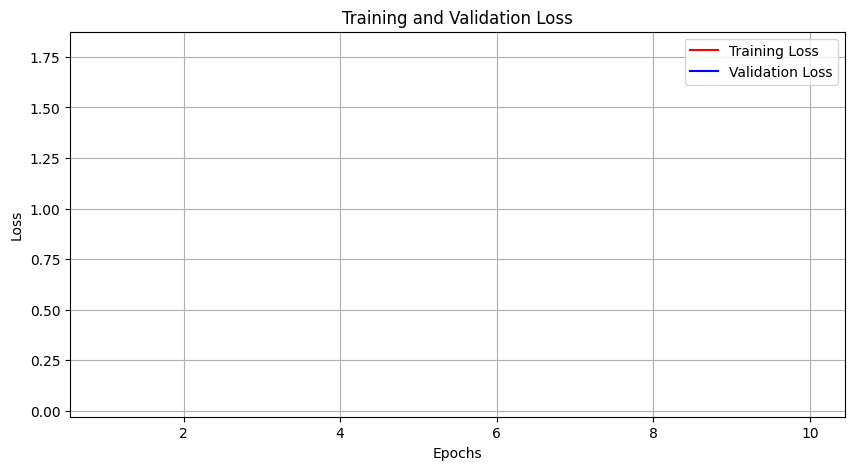

In [57]:
import matplotlib.pyplot as plt

# Assuming you have stored the losses during training in these lists
data=pd.DataFrame(trainer.state.log_history)
print(data.head(10))
data=data.iloc[:200]
train_losses=data['loss']
eval_losses=data['eval_loss']
epoch=data['epoch']
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(epoch,train_losses, label='Training Loss', color='red')
plt.plot(epoch, eval_losses, label='Validation Loss', color='blue')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [58]:

from sklearn.metrics import confusion_matrix
# Now you can make predictions
predictions = trainer.predict(small_test_dataset)

# Get the predicted labels and true labels
predicted_labels = np.argmax(predictions.predictions, axis=1)
true_labels =  small_test_dataset['labels']
# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print(cm)

[[71  9  0  1  0  1  0]
 [ 3 63  3  0  3  0  0]
 [ 0  5 37  3  1  6  0]
 [ 0  1  1 51  1  0  0]
 [ 1  4  0  3 70  0  0]
 [ 0  0  1  1  2 39  1]
 [ 1  0  1  0  0  0 44]]


In [59]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        82
           1       0.77      0.88      0.82        72
           2       0.86      0.71      0.78        52
           3       0.86      0.94      0.90        54
           4       0.91      0.90      0.90        78
           5       0.85      0.89      0.87        44
           6       0.98      0.96      0.97        46

    accuracy                           0.88       428
   macro avg       0.88      0.88      0.88       428
weighted avg       0.88      0.88      0.88       428



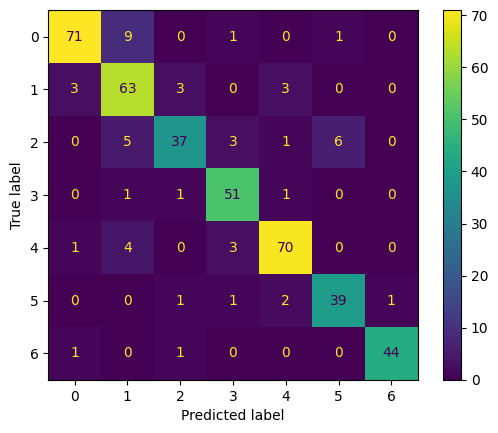

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [61]:
#overall performance of the fine-tuned BERT model on Amharic new classification
trainer.evaluate(small_test_dataset)

{'eval_loss': 0.6008928418159485,
 'eval_precision': 0.8797563200695996,
 'eval_recall': 0.8761682242990654,
 'eval_f1': 0.8759868741835638,
 'eval_accuracy': 0.8761682242990654,
 'eval_runtime': 14.6936,
 'eval_samples_per_second': 29.128,
 'eval_steps_per_second': 3.675,
 'epoch': 10.0}

# New Section